In [1]:
import pandas as pd

data = {}

path_to_data = r'all_time-series/ts_cut'

import os
import numpy as np
import re

parser_regex = r'(ihb|china|rmet)_(open|close)_strategy-(\d)_(GSR|noGSR).npy'
extractor = re.compile(parser_regex)

items = {atlas_name: {dataset_name: []
                      for dataset_name in ['china', 'ihb', 'rmet']}
         for atlas_name in ['HCPex', 'Brainnetome', 'AAL', 'Schaefer200']}

for root, dirs, files in os.walk(path_to_data):
    for file in files:
        atlas = root.split(os.sep)[1]
        source = root.split(os.sep)[2]
        items[atlas][source].append(np.load(os.path.join(root, file)))

In [2]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

# не всегда np.corrcoef корректно возвращает
measurements = items['Brainnetome']['rmet'][0][0]
corr = np.corrcoef(measurements.T)
corr = (corr + corr.T) / 2                         # made symmetric
np.fill_diagonal(corr, 1)                        # put 1 on the diagonal

dissimilarity = 1 - np.abs(corr)
hierarchy = linkage(squareform(dissimilarity), method='average')
labels = fcluster(hierarchy, 0.5, criterion='distance')

array([25, 32, 63, 35, 63, 49, 61, 35, 61, 61, 33, 35, 49, 49, 63, 35, 29,
       33, 53, 32, 29, 32, 63, 32, 63, 35, 85, 85, 69, 68, 69, 66, 21, 37,
       85,  6, 23, 37, 23, 36, 56, 62, 85, 85, 85, 57, 85, 85, 85, 57, 85,
        6, 59, 60, 61, 61, 61, 59, 61, 59, 36, 36, 70, 67, 58, 28, 59, 59,
       85, 57, 82, 74, 47, 46, 21, 74,  2, 81, 22, 75, 78, 79, 78, 79, 19,
       74, 78, 79, 26, 79, 77, 84, 78, 79, 27, 79, 76, 84, 78, 79, 78, 79,
       76, 79, 84, 84, 84, 84, 55, 80,  8, 79, 72, 72,  3,  9, 86, 77,  8,
       73, 21, 74, 20, 74, 58, 65, 65, 65, 65, 65, 61, 61, 65, 65, 64, 83,
       64, 34, 70, 66, 30, 34, 41, 41, 36, 36, 58, 58, 58, 58, 42, 42, 42,
       42, 59, 59, 44, 44, 59, 59, 61, 61, 45, 48, 88, 87, 71, 38, 24, 46,
       44, 44, 23, 38, 40, 40, 51, 52, 50, 50, 39, 39, 43, 43, 28, 28, 56,
       50, 84, 84, 31, 31, 84, 32, 31, 31, 31, 31, 83, 83, 84, 84, 84, 84,
       84, 84, 32, 32, 65, 65,  1,  1,  4,  5,  7,  7,  7,  7, 53, 54, 13,
       13, 13, 57, 13, 13

In [27]:
clusters = np.unique(labels)
n_clusters = len(clusters)

cluster_corr = np.zeros((n_clusters, n_clusters))

for i, cl_i in enumerate(clusters):
    idx_i = np.where(labels == cl_i)[0]
    for j, cl_j in enumerate(clusters):
        idx_j = np.where(labels == cl_j)[0]
        sub_corr = corr[np.ix_(idx_i, idx_j)]
        
        cluster_corr[i, j] = abs(np.mean(sub_corr))

np.fill_diagonal(cluster_corr, 1) 

print("Матрица корреляций между кластерами:")
print(cluster_corr)


Матрица корреляций между кластерами:
[[1.         0.49377454 0.4103747  ... 0.04107389 0.09442516 0.02708063]
 [0.49377454 1.         0.43214843 ... 0.08056599 0.12862761 0.06016564]
 [0.4103747  0.43214843 1.         ... 0.23133279 0.04448453 0.0408641 ]
 ...
 [0.04107389 0.08056599 0.23133279 ... 1.         0.2460764  0.01531539]
 [0.09442516 0.12862761 0.04448453 ... 0.2460764  1.         0.04710438]
 [0.02708063 0.06016564 0.0408641  ... 0.01531539 0.04710438 1.        ]]


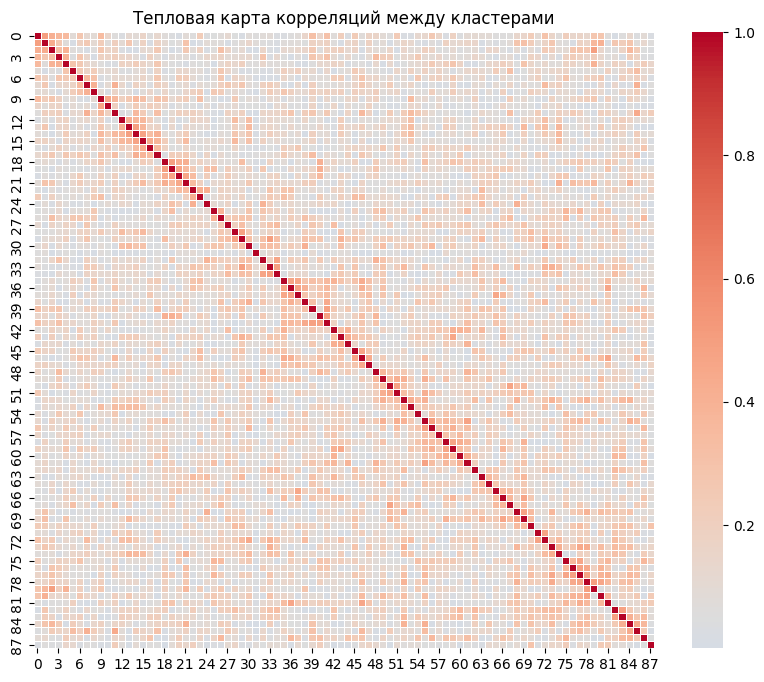

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.heatmap(cluster_corr, fmt=".2f", cmap="coolwarm", center=0.05, linewidths=0.5)

plt.title("Тепловая карта корреляций между кластерами")

plt.show()